TensorFlow Version: 2.18.0
No GPU available


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5


c:\Users\Miha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1562 ━━━━━━━━━━━━━━━━━━━━ 1:21 261ms/step - accuracy: 0.1015 - loss: 2.3646

c:\Users\Miha\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 410s 261ms/step - accuracy: 0.1025 - loss: 2.3606 - val_accuracy: 0.0974 - val_loss: 2.3525
Epoch 2/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 397s 254ms/step - accuracy: 0.1203 - loss: 2.3153 - val_accuracy: 0.1280 - val_loss: 2.3369
Epoch 3/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 397s 254ms/step - accuracy: 0.1354 - loss: 2.2953 - val_accuracy: 0.1873 - val_loss: 2.3029
Epoch 4/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 397s 254ms/step - accuracy: 0.1468 - loss: 2.2744 - val_accuracy: 0.1725 - val_loss: 2.3091
Epoch 5/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 398s 254ms/step - accuracy: 0.1570 - loss: 2.2581 - val_accuracy: 0.1765 - val_loss: 2.2169
312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.2047 - loss: 2.1945
Точність на тестових даних (без fine-tuning): 0.20
Epoch 1/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1894s 1s/step - accuracy: 0.3288 - loss: 4.1534 - val_accuracy: 0.1032 - val_loss: 5.4357
Epoch 2/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1883s 1s/step - accuracy: 0.6046 - loss: 1.1

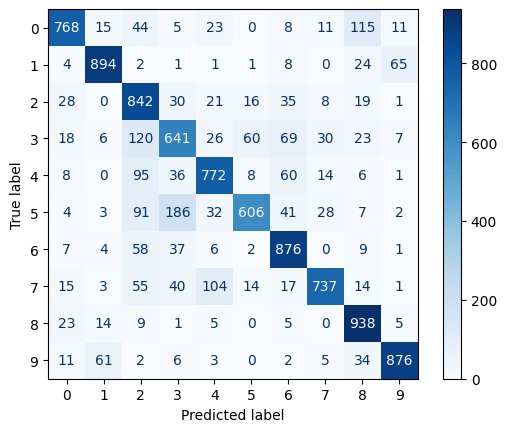

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


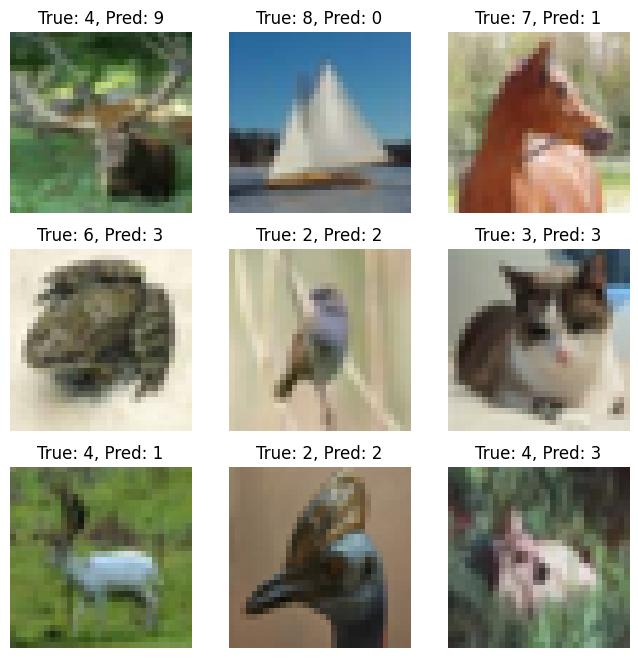

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Перевіримо версію TensorFlow
print(f"TensorFlow Version: {tf.__version__}")

# Перевірка доступних GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(f"Available GPUs: {physical_devices}")
    tf.config.set_visible_devices(physical_devices, 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available")

# Завантаження датасету CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Параметри для масштабування зображень
IMG_SIZE = 224  # розмір, який потрібен для MobileNetV2
BATCH_SIZE = 32

# Використання ImageDataGenerator для нормалізації та аугментації даних
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Масштабування пікселів в діапазон [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2  # Розподіл на тренувальні та валідаційні дані
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Генератори для тренування та тестування
train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation'
)

test_generator = test_datagen.flow(
    x_test, y_test,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Завантаження попередньо натренованої моделі MobileNetV2 з TensorFlow
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')

# Завдання 1: Заморожуємо шари мобільної моделі
# Заморожуємо шари попередньо натренованої моделі для уникнення їх тренування
base_model.trainable = False

# Створення моделі з додатковим шаром Resizing
inputs = layers.Input(shape=(32, 32, 3))  # Розмір початкового зображення
x = layers.Resizing(IMG_SIZE, IMG_SIZE)(inputs)  # Змінюємо розмір до 224x224
x = base_model(x, training=False)  # Пропускаємо через попередньо натреновану модель
x = layers.GlobalAveragePooling2D()(x)  # Глобальне згортання для зменшення розмірності
x = layers.Dense(10, activation='softmax')(x)  # Класифікація на 10 класів

model = models.Model(inputs, x)

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Завдання 2: Навчання моделі без fine-tuning
# Навчання моделі на початкових даних
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // BATCH_SIZE,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(x_train) // BATCH_SIZE
)

# Оцінка моделі на тестових даних
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(x_test) // BATCH_SIZE)
print(f"Точність на тестових даних (без fine-tuning): {test_accuracy:.2f}")

# Завдання 3: Fine-tuning (розморожування кількох верхніх шарів)
# Розморозимо верхні шари для донавчання моделі
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Перенавчання моделі
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // BATCH_SIZE,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(x_train) // BATCH_SIZE
)

# Оцінка моделі після fine-tuning
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(x_test) // BATCH_SIZE)
print(f"Точність на тестових даних (з fine-tuning): {test_accuracy:.2f}")

# Завдання 4: Побудова матриці похибок
# Побудова та візуалізація матриці похибок для тестових даних
y_pred = model.predict(test_generator, steps=len(x_test) // BATCH_SIZE + 1)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test[:len(y_pred_classes)], y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# Завдання 5: Візуалізація кількох прикладів із передбаченнями
# Візуалізація кількох зображень з передбаченнями класів
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    img = x_test[idx:idx+1] / 255.0  # Нормалізуємо без зміни розміру
    prediction = model.predict(img)
    pred_class = np.argmax(prediction, axis=1)
    
    axes[i].imshow(x_test[idx])
    axes[i].set_title(f"True: {y_test[idx][0]}, Pred: {pred_class[0]}")
    axes[i].axis('off')

plt.show()